Импорт библиотек

In [2]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing

Вывод общей информации о датасете

In [ ]:
df = pd.read_csv('car_price_dataset.csv',encoding='cp1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         10001 non-null  int64  
 1   Engine_Size  10001 non-null  float64
 2   Mileage      10001 non-null  int64  
 3   Doors        10001 non-null  int64  
 4   Owner_Count  10001 non-null  int64  
 5   Price        10001 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Выберем только числовые столбцы из датасета для дальнейшей нормализации

In [18]:
df = df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         10001 non-null  int64  
 1   Engine_Size  10001 non-null  float64
 2   Mileage      10001 non-null  int64  
 3   Doors        10001 non-null  int64  
 4   Owner_Count  10001 non-null  int64  
 5   Price        10001 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Произведение нормализации столбца Price с использованием L2-нормализации

In [20]:
array = np.array(df['Price']) 
normal_arr = preprocessing.normalize([array]) 
print(normal_arr)

[[0.00905872 0.01288531 0.01190388 ... 0.01051327 0.00435193 0.00356125]]


Проверка правильности проведения нормализации отдельного столбца

In [21]:
print(sum([x**2 for x in normal_arr[0]]))

1.0


Стандартизация данных по столбцам и по строкам

In [22]:
normal1 = preprocessing.normalize(df, axis=0)
print(normal1)

[[0.01004148 0.01307128 0.01681522 0.00817597 0.0150952  0.00905872]
 [0.01000171 0.00622442 0.00031062 0.00545064 0.00905712 0.01288531]
 [0.01004148 0.01307128 0.0134223  0.01090129 0.00603808 0.01190388]
 ...
 [0.00999177 0.00933663 0.00502605 0.01362661 0.00301904 0.01051327]
 [0.009952   0.00435709 0.01309358 0.01090129 0.00301904 0.00435193]
 [0.00994703 0.00653564 0.00915632 0.00817597 0.00905712 0.00356125]]


In [23]:
normal2 = preprocessing.normalize(df, axis=1)
print(normal2)

[[6.96370118e-03 1.44789826e-05 9.99546225e-01 1.03421305e-05
  1.72368841e-05 2.93061504e-02]
 [1.50404376e-01 1.49507332e-04 4.00380636e-01 1.49507332e-04
  2.24260999e-04 9.03921332e-01]
 [8.71748358e-03 1.81254609e-05 9.98799208e-01 1.72623437e-05
  8.63117186e-06 4.82094104e-02]
 ...
 [2.30380596e-02 3.43851636e-05 9.93318606e-01 5.73086060e-05
  1.14617212e-05 1.13081341e-01]
 [8.86555407e-03 6.19968816e-06 9.99797140e-01 1.77133947e-05
  4.42834869e-06 1.80853760e-02]
 [1.26701668e-02 1.32970266e-05 9.99695787e-01 1.89957523e-05
  1.89957523e-05 2.11612680e-02]]


Приведение данных к диапазону (0, 3) с использованием MinMaxScaler

In [24]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3)) 
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

       Year  Engine_Size   Mileage  Doors  Owner_Count     Price
0  2.608696         2.40  2.899944    1.0         3.00  1.196430
1  1.565217         0.75  0.053324    0.0         1.50  1.857309
2  2.608696         2.40  2.314752    2.0         0.75  1.687811
3  3.000000         0.75  1.609879    0.0         0.00  1.799890
4  0.391304         1.20  2.866675    1.0         1.50  0.159561


Приведение данных к диапазону (-1, 1) с использованием MaxAbsScaler

In [25]:
scaler = preprocessing.MaxAbsScaler() 
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

       Year  Engine_Size   Mileage  Doors  Owner_Count     Price
0  0.998517         0.84  0.966651    0.6          1.0  0.464510
1  0.994563         0.40  0.017856    0.4          0.6  0.660729
2  0.998517         0.84  0.771603    0.8          0.4  0.610404
3  1.000000         0.40  0.536665    0.4          0.2  0.643681
4  0.990114         0.52  0.955562    0.6          0.6  0.156658


Приведение данных к диапазону (25, 75) с использованием RobustScaler

In [26]:
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
names = df.columns 
d = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

       Year  Engine_Size   Mileage  Doors  Owner_Count     Price
0  0.727273          0.6  0.942347    0.0          1.0 -0.080405
1  0.000000         -0.5 -0.968384   -1.0          0.0  0.728378
2  0.727273          0.6  0.549549    1.0         -0.5  0.520946
3  1.000000         -0.5  0.076419   -1.0         -1.0  0.658108
4 -0.818182         -0.2  0.920016    0.0          0.0 -1.349324


Равномерное распределение с использованием QuantileTransformer

       Year  Engine_Size   Mileage     Doors  Owner_Count     Price
0  0.855856     0.802803  0.969495  0.374374     1.000000  0.456445
1  0.519019     0.249249  0.017470  0.000000     0.504505  0.843236
2  0.855856     0.802803  0.777195  0.628629     0.304805  0.758266
3  1.000000     0.249249  0.537494  0.000000     0.000000  0.815615
4  0.144645     0.397397  0.957867  0.374374     0.504505  0.024837


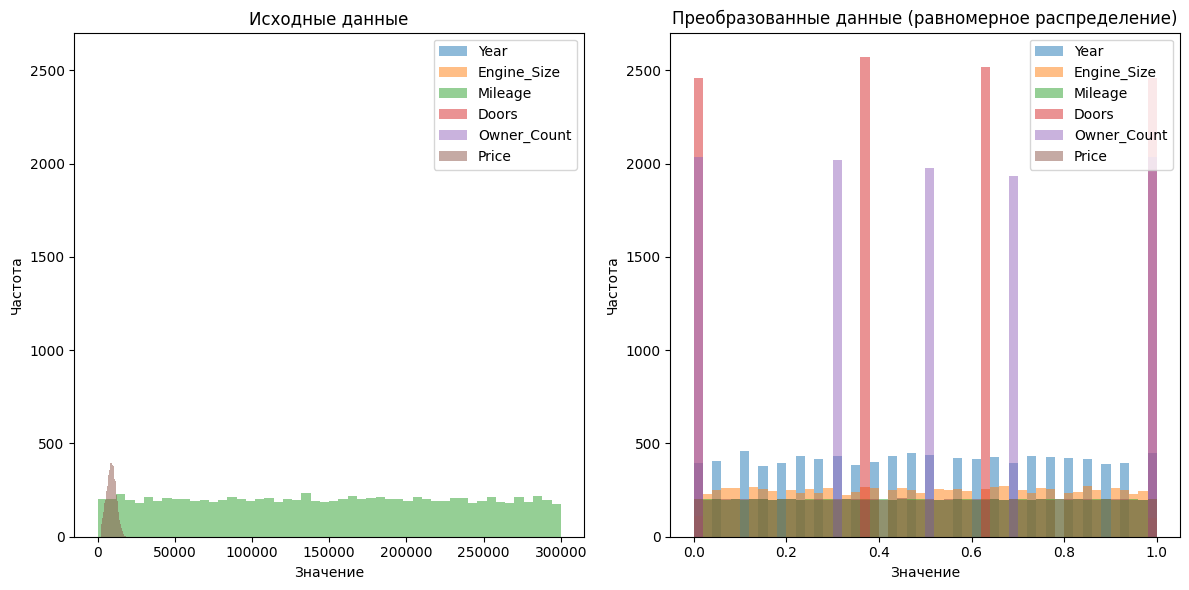

In [27]:
from matplotlib import pyplot as plt

quantile_transformer = preprocessing.QuantileTransformer()
names = df.columns 
d = quantile_transformer.fit_transform(df) 
scaled_df = pd.DataFrame(d, columns=names) 
print(scaled_df.head(5))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for column in df.columns:
    plt.hist(df[column], bins=50, alpha=0.5, label=column)
plt.title('Исходные данные')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 2, 2)
for column in scaled_df.columns:
    plt.hist(scaled_df[column], bins=50, alpha=0.5, label=column)
plt.title('Преобразованные данные (равномерное распределение)')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

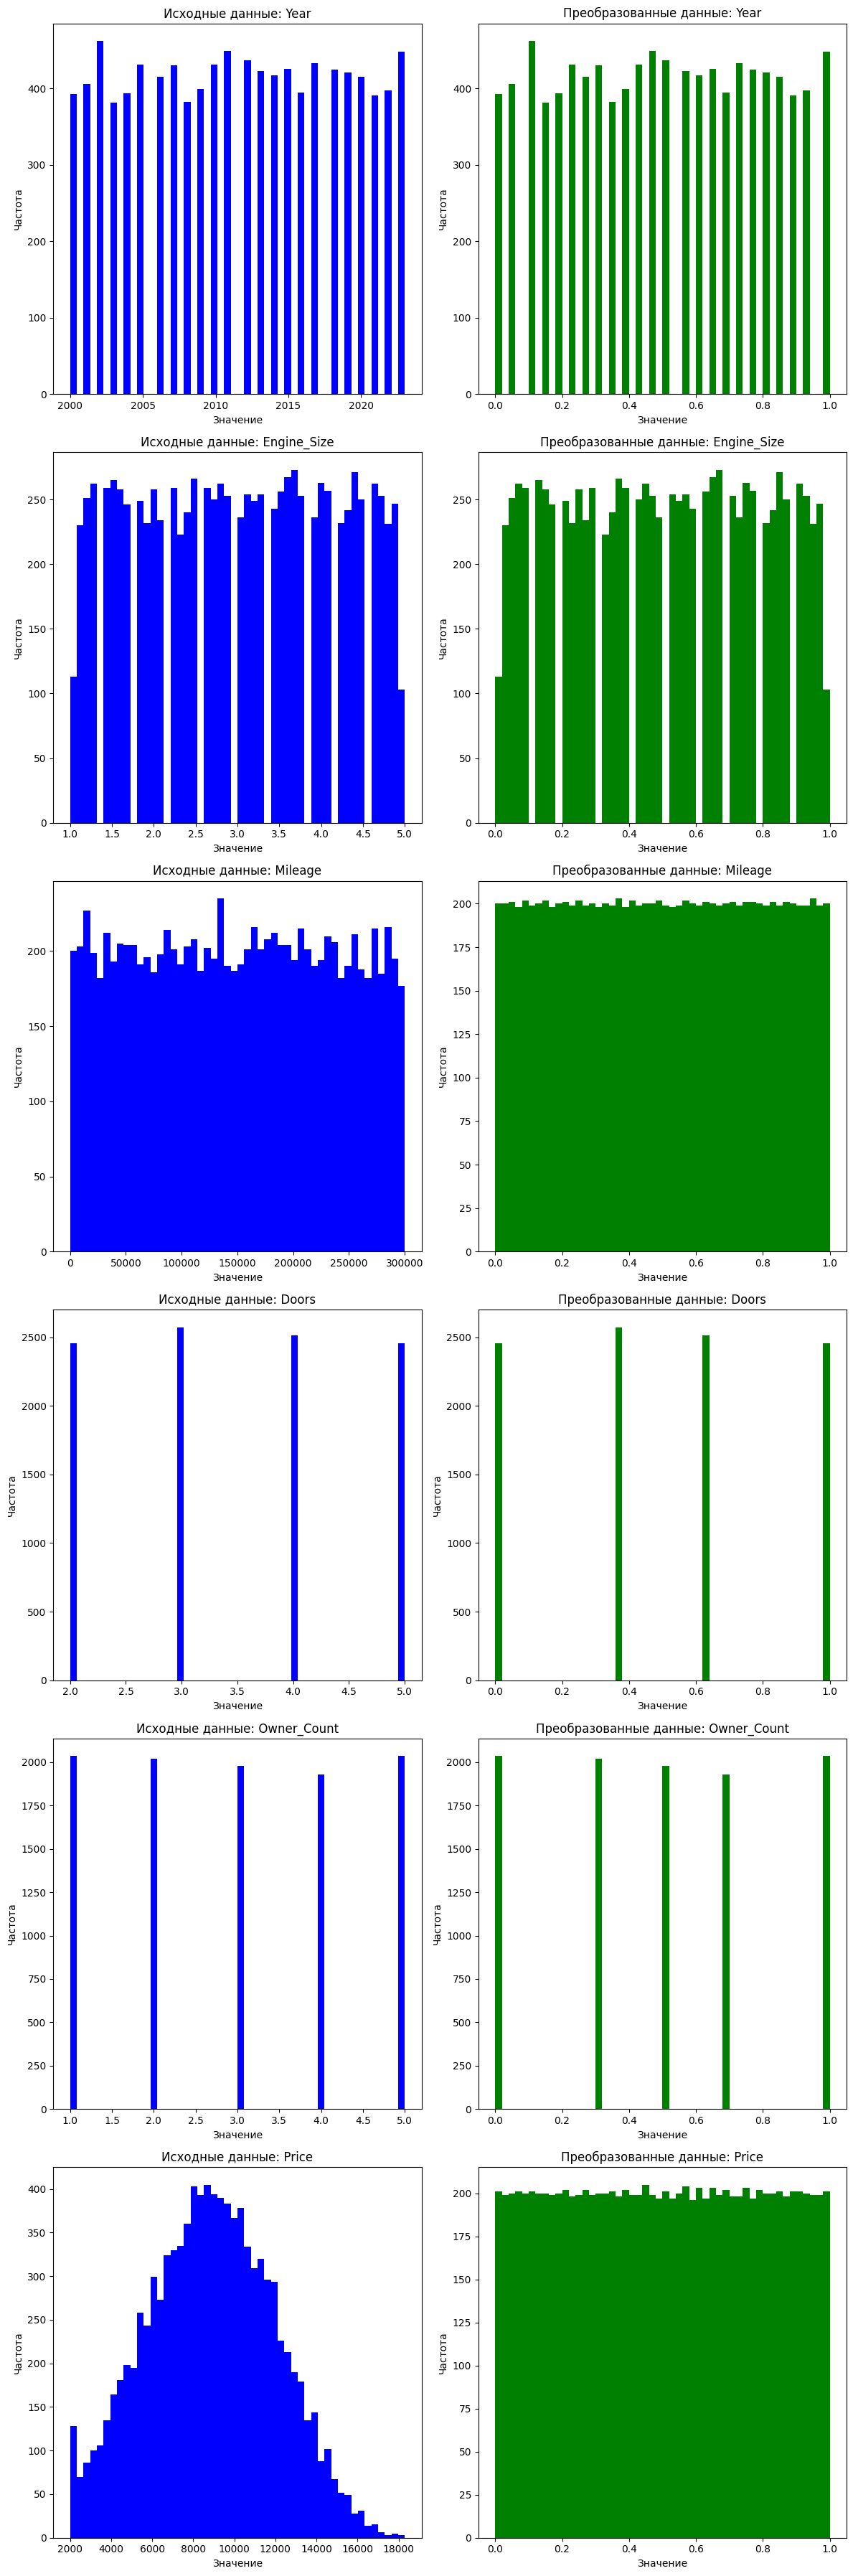

In [28]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(12, 6 * len(df.columns)))
for i, column in enumerate(df.columns):
    axes[i, 0].hist(df[column], bins=50, color='blue')
    axes[i, 0].set_title(f'Исходные данные: {column}')
    axes[i, 0].set_xlabel('Значение')
    axes[i, 0].set_ylabel('Частота')

    axes[i, 1].hist(scaled_df[column], bins=50, color='green')
    axes[i, 1].set_title(f'Преобразованные данные: {column}')
    axes[i, 1].set_xlabel('Значение')
    axes[i, 1].set_ylabel('Частота')

plt.tight_layout()
plt.show()